<a href="https://colab.research.google.com/github/kentokura/python_medical_images/blob/master/chapter3/chap3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from IPython.display import Image, display_png

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3.5 画像階調のリスケール(ダウンスケールとアップスケール)
以下を学ぶ
- 16-bitを8bit画像へダウンスケールする
- ダウンスケールした8-bit画像を16-bitへアップスケールする


本節の学び
- 画像のリサイズ
- 有効視野の計算
- リサイズに伴うピクセルスペーシングの計算
- ピクセル補完の比較

### 3.5.1
アップスケールとダウンスケール

リスト 3.5.1 リスケール

original data type (512, 512) uint16
original min and max 30720 34516
down-scaled(8-bit)	min and max 0 255
up-scaled(16-bit)	min and max 0 255


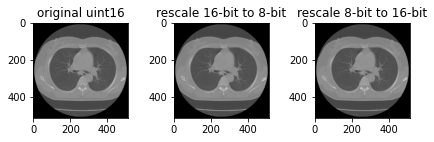

In [39]:
ct = cv2.imread('/content/drive/My Drive/DATASET/dataset/CT_LEE_IR87a-NOCAL.png',
                cv2.IMREAD_UNCHANGED)
# display_png(Image('/content/drive/My Drive/DATASET/dataset/CT_LEE_IR87a-NOCAL.png'))
# 原画像のデータタイプを確認
print("original data type", ct.shape, ct.dtype)
print("original min and max", np.amin(ct), np.amax(ct))
plt.subplot(1,3,1)
plt.tight_layout()
plt.title("original "+str(ct.dtype))
plt.imshow(ct, cmap="gray")

# resclale(16-bitを8-bitへdown-scaleする)
# 先にピクセル値を0-255の範囲に変換する
amin=np.amin(ct)
amax=np.amax(ct)
scale = 255.0 / (amax-amin)
values = ((ct-amin)*scale)
values[values < 0] = 0
values[values > 255] = 255
pixelsInt8 = np.uint8(values)
print("down-scaled(8-bit)\tmin and max", np.amin(pixelsInt8),
      np.amax(pixelsInt8))
plt.subplot(1,3,2)
plt.tight_layout()
plt.title("rescale 16-bit to 8-bit")
plt.imshow(pixelsInt8, cmap="gray")

# up-scale(8-bitを16bitへup-scaleする) (非可逆)
# 8-bitの数値のままアップスケールする
pixelsInt16 = np.uint16(pixelsInt8)
print("up-scaled(16-bit)\tmin and max",
      np.amin(pixelsInt16), np.amax(pixelsInt16))
plt.subplot(1,3,3)
plt.tight_layout()
plt.title("rescale 8-bit to 16-bit")
plt.imshow(pixelsInt16, cmap="gray")
plt.show()